In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('fa_casoshumanos_1994-2023.csv',sep=';',encoding='latin1')
df_ce = df.reindex(columns=['MACRORREG_LPI', 'COD_UF_LPI', 'UF_LPI', 'COD_MUN_LPI', 'MUN_LPI', 'MES_IS', 'ANO_IS'])

In [118]:
df

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2764,N,13,AM,130280.0,MARAÃ,M,12,14/02/2023,7.0,2.0,2023,2022/2023,NÃO,NaN
2764,2765,N,13,AM,130250.0,MANACAPURU,M,16,02/04/2023,14.0,4.0,2023,2022/2023,SIM,13/04/2023
2765,2766,SE,35,SP,355080.0,SÃO SEBASTIÃO DA GRAMA,M,44,18/02/2023,7.0,2.0,2023,2022/2023,NÃO,NaN
2766,2767,SE,35,SP,354910.0,SÃO JOÃO DA BOA VISTA,M,44,25/04/2023,17.0,4.0,2023,2022/2023,SIM,30/04/2023


In [100]:
df_ce['MACRORREG_LPI'].value_counts()

MACRORREG_LPI
SE    2354
N      193
CO     147
S       62
NE      12
Name: count, dtype: int64

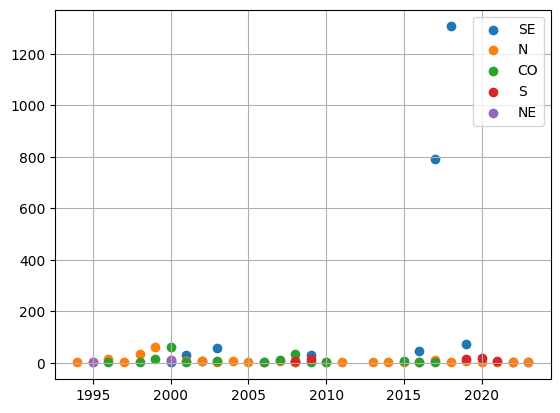

In [101]:
for r in ['SE', 'N', 'CO', 'S', 'NE']:
   filtro = df_ce['MACRORREG_LPI'] ==  r
   ano_infectados = df_ce[filtro]['ANO_IS'].value_counts().to_dict()
   plt.scatter(ano_infectados.keys(),ano_infectados.values(),label=f'{r}')

plt.legend()
plt.grid()

In [102]:
dict(ano_infectados)

{2000: 10, 1995: 2}

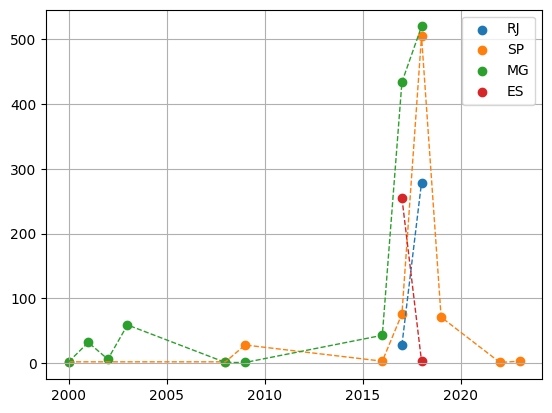

In [103]:
dfSE = df_ce[df_ce['MACRORREG_LPI']=='SE']
estados_SE = dfSE['UF_LPI'].tolist()

for estado in set(estados_SE):
   filtro = dfSE['UF_LPI'] ==  estado
   ano_infectados = dfSE[filtro]['ANO_IS'].value_counts().to_dict()
   ano_infectados=dict(sorted(ano_infectados.items()))
   plt.scatter(ano_infectados.keys(),ano_infectados.values(),label=f'{estado}')
   plt.plot(ano_infectados.keys(),ano_infectados.values(),linewidth=1,linestyle='--')

plt.legend()
plt.grid()

In [114]:
dfSE['MUN_LPI'].value_counts()

MUN_LPI
MAIRIPORÃ          168
ANGRA DOS REIS      66
LADAINHA            52
ATIBAIA             50
JUIZ DE FORA        41
                  ... 
COQUEIRAL            1
PADRE PARAÍSO        1
BATATAIS             1
MARTINS SOARES       1
SANTA ALBERTINA      1
Name: count, Length: 404, dtype: int64

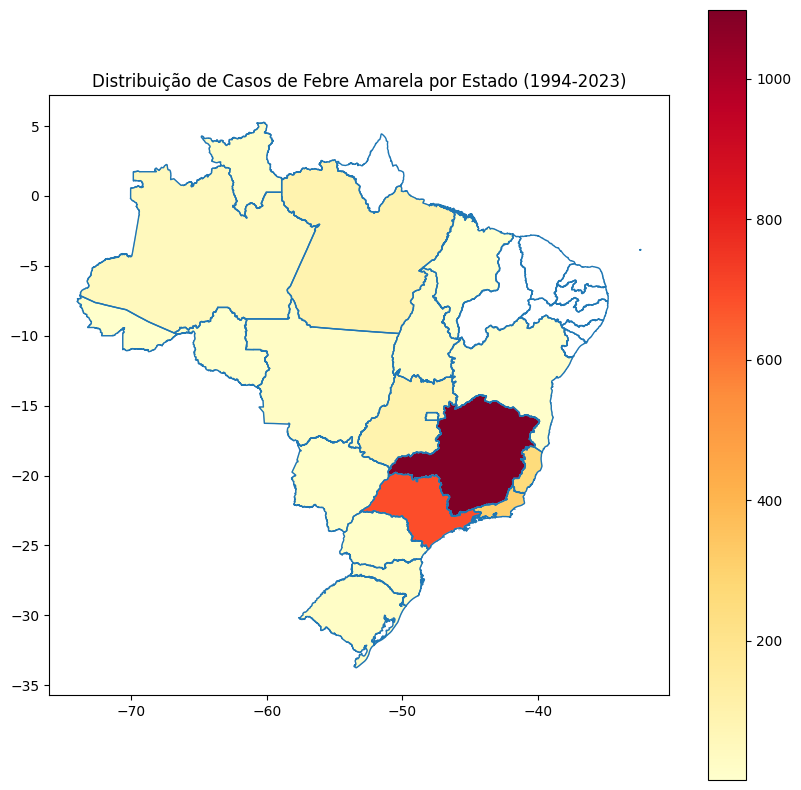

In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile do Brasil, disponível online ou localmente
# Este arquivo contém os contornos dos estados brasileiros
brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Agrupar por estado (UF_LPI) e calcular o número total de casos
df_agg = df.groupby('UF_LPI')['ANO_IS'].count().reset_index()
df_agg.columns = ['UF', 'Casos']

# Fazer o merge entre o shapefile dos estados e os dados de casos
brasil = brasil.merge(df_agg, left_on='sigla', right_on='UF', how='left')

# Configurar o gradiente de cores baseado no número de casos
vmin, vmax = df_agg['Casos'].min(), df_agg['Casos'].max()

# Criar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
brasil.boundary.plot(ax=ax, linewidth=1)
brasil.plot(column='Casos', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajustar o título e mostrar o gráfico
plt.title('Distribuição de Casos de Febre Amarela por Estado (1994-2023)')
plt.savefig("mapa-casos-gradiente.png")
plt.show()



In [106]:
list(df['MUN_LPI'])

['ALTO ALEGRE',
 'PACARAIMA',
 'AMARANTE DO MARANHÃO',
 'AMARANTE DO MARANHÃO',
 'CONCEIÇÃO DO ARAGUAIA',
 'TAPAUÁ',
 'RIO PRETO DA EVA',
 'MANAQUIRI',
 'MANACAPURU',
 'SANTA ISABEL DO RIO NEGRO',
 'CAREIRO',
 'ANORI',
 'MANAQUIRI',
 'IRANDUBA',
 'TABATINGA',
 'MANACAPURU',
 'BARCELOS',
 'MANAUS',
 'PONTA PORÃ',
 'SANTA ISABEL DO RIO NEGRO',
 'PORTO VELHO',
 'ALMEIRIM',
 'ALMEIRIM',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'MARCELÂNDIA',
 'PRESIDENTE FIGUEIREDO',
 'PRESIDENTE FIGUEIREDO',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'AFUÁ',
 'REDENÇÃO',
 'AFUÁ',
 'GURUPÁ',
 'ÓBIDOS',
 'AFUÁ',
 'ALTO ALEGRE',
 'BANNACH',
 'FLORESTA DO ARAGUAIA',
 'ITAITUBA',
 'ALTO ALEGRE',
 'ALTO ALEGRE',
 'ALTO ALEGRE',
 'MUCAJAÍ',
 'IRACEMA',
 'SANTA ISABEL DO RIO NEGRO',
 'ALTO ALEGRE',
 'CAMPINÁPOLIS',
 'CAMPINÁPOLIS',
 'AFUÁ',
 'BREVES',
 'BREVES',
 'BREVES',
 'BREVES',
 'RECURSOLÂNDIA',
 'AFUÁ',
 'BREVES',
 'AFUÁ',
 'AFUÁ',
 'ITACOATIARA',
 'AFUÁ',
 'AFUÁ

In [139]:
cidade_norte = (df[df['MACRORREG_LPI'] == 'N'])['MUN_LPI']
cidade_norte

0                     ALTO ALEGRE
1                       PACARAIMA
4           CONCEIÇÃO DO ARAGUAIA
5                          TAPAUÁ
6                RIO PRETO DA EVA
                  ...            
2759    SÃO SALVADOR DO TOCANTINS
2760                       GURUPI
2763                        MARAÃ
2764                   MANACAPURU
2767                 RORAINÓPOLIS
Name: MUN_LPI, Length: 193, dtype: object